# Import Libraries

In [161]:
import pandas as pd
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

# Read Data

In [129]:
df = pd.read_csv('Tweets.csv')

In [130]:
df.tail()

tweet_id airline_sentiment  airline_sentiment_confidence  \
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence   airline  \
14635                     NaN                     0.0000  American   
14636  Customer Service Issue                     1.0000  American   
14637                     NaN                        NaN  American   
14638  Customer Service Issue                     0.6659  American   
14639                     NaN                     0.0000  American   

      airline_sentiment_gold             name negativereason_gold  \
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created tweet_location  \
14635         NaN  2015-02-22 12:01:01 -0800            NaN   
14636         NaN  2015-02-22 11:59:46 -0800          Texas   
14637         NaN  2015-02-22 11:59:15 -0800  Nigeria,lagos   
14638         NaN  2015-02-22 11:59:02 -0800     New Jersey   
14639         NaN  2015-02-22 11:58:51 -0800     dallas, TX   

                    user_timezone  
14635                         NaN  
14636                         NaN  
14637                         NaN  
14638  Eastern Time (US & Canada)  
14639                         NaN

# Preprocessing

## Select only text and airline_sentiment

In [131]:
df = df[['text','airline_sentiment']]

In [132]:
df.tail()

text airline_sentiment
14635  @AmericanAir thank you we got on a different f...          positive
14636  @AmericanAir leaving over 20 minutes Late Flig...          negative
14637  @AmericanAir Please bring American Airlines to...           neutral
14638  @AmericanAir you have my money, you change my ...          negative
14639  @AmericanAir we have 8 ppl so we need 2 know h...           neutral

## Printing all text to observe data

In [133]:
for text in df['text']:
    print(text)

@VirginAmerica What @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it
@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA
@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)
@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP
@virginamerica Well, I didn't…but NOW I DO! :-D
@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.
@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24
@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D
@V

@united Kurt and the crew on UA1745 were amazing today. They made my son's birthday with their kindness. Hope to fly with them again soon!
@united Been on hold on the phone for well over half an hour, waiting to make a reservation change I *wanted* to make online. Help!
@united 2/2 Instead, had to wait on plane from Ottawa that never came. Now I'm back home and have to try again tomorrow. Suitcase still lost
@united i'm glad u can solve the prob. But my experience remains - will not fly again on #United
@united u Cancelled Flighted my flight from IAD to JAX. Was supposed to use plane from BNA but u used that plane for another destination instead. 1/2
@United appreciate the early arrival of UA1002, but any chance ORD will ever bring the bags out?
@united - it is possible to make a ticket change via Twitter? Traveling internationally and can't make calls... Thanks in advance!
@united A broken luggage and a mild case of food poisoning from UA5 LHR-IAH. Who can I email about this?
@united 

@SouthwestAir Katie, Gate C47, Denver International, fantastic customer service helping me and 2 new flyers; thx for amazing staff!
@SouthwestAir Kudos to bag handler at DTW gate 21 at 7:10 pm. Ran to keep bags from hitting ground in 9 degree temp! http://t.co/5tXU5tSFkJ
@SouthwestAir crew on flight 206 is awesome! Tell them I sent this tweet and maybe they will give me free wifi... #canthurtasking
@SouthwestAir thankyou :))❤️
@SouthwestAir how much is ur wifi fam
@SouthwestAir @Imaginedragons I tried. 😔 It's okay
@SouthwestAir happy to enter your sweepstakes again #nutsaboutsouthwest
@SouthwestAir thanks for the great customer service today! 👍👌
@SouthwestAir is the vinyl part of the prize too?
@SouthwestAir beyond ready
@SouthwestAir when I called I was told my bag had made it to PHL, but still has not been delivered or any call from the delivery service
@SouthwestAir Looks like brooding skies out of ONT this evening. http://t.co/X9BLwgWA68
@SouthwestAir No monkey business we luv SWA!

@SouthwestAir has the winner for #DestinationDragons been announced yet? If not when will they be??
@SouthwestAir On my flight today from RSW to GRR I was able to snag a free SW Agent to check for me. It looks like we are (finally) all set.
@SouthwestAir Yeah, we figured it out.  Thanks.
@SouthwestAir thanks for the drink tickets hook up! Can't wait for my first international flight with you to NAS! #pumped
@SouthwestAir took our carryon bag with essential attire for a life changing interview tomorrow &amp; it's not here; can we expect compensation?
@SouthwestAir  I got rebooked for tomorrow
@SouthwestAir Hi! I just saw a Black History month commercial on TV &amp; Im excited! In support of this month,will you all grant me 1 free trip
@SouthwestAir took our BOS to BWI plane for a flight to StL and promised a replacement  1.5 hours Late Flightr. Now 2.5 hours delayed. Not happy.
@SouthwestAir though I work for another major airline,  I LOVE your Black history month commercial. I Thank yo

First base already? I like your style @JetBlue
@JetBlue Hold for 15 min, a couple of rings, then "mailbox has not been set up yet." Customer service forwarding to their cell phones? C'mon
@JetBlue Does your home airport not count in the badge system? My TB account says 2 flights but I've taken 3 this year.
@JetBlue is bag check cut off 30 minutes before the original departure time or the estimated time shown online?
@JetBlue I know where you guys jet! LOL, but if you love me so much, help a brother out :) Hot weather, great nightlife, 2-3 hour flight
@JetBlue Airways Adds New Charter #Flight to Cuba - #Travel Wires (blog) http://t.co/Swb1gR57Cc
Aww, is it? @JetBlue I guess now I need to book a flight to somewhere warm ASAP! Any suggestions?
@JetBlue love traveling with Jetblue. Cant wait to go to Paris oui oui!!! NYC was awesomeee!
@JetBlue 
But if customer service ment anything to you.... you would try. Quoting policy is never effective customer service.
@JetBlue thank you. Is there a

@USAirways see? No response? Obviously you think this "service" is acceptable. #customerservicefail
“@USAirways: We're sincerely sorry, Sean. Reservations is working hard to answer everyone's call and we appreciate your patience.” #false
@USAirways absolutely
@USAirways It wasn't weather this morning.  AWE1701 diverted back to BOS due to mechanical issues.  So far lost one of 3 days :(
@USAirways I have been in contact with 3 people and still no answers. You keep sending me to @Expedia and they keep sending me to you!
@USAirways @AmericanAir no one appreciates the sass of the gate agent at Gate C38 at LGA flight US626. Irritated customers
@USAirways how do I get you to stop sending me emails about my ex boyfriends account? I don't care how many points he has! He only has
@USAirways we have seats.  on phone Iwas  told I was getting error msg due to paid 1st class upgrd. told to check in after 12am.sound right?
@USAirways waiting for bags now over 25min in Phl bag claim!
@USAirways aweso

@AmericanAir Ok. We will probably Cancelled Flight our flights then, take a refund, and get home another way. Wednesday won't work for us.
@AmericanAir  that's what I am hoping for
@AmericanAir Also, I have to wait more than 2 hours before I can speak to someone on the phone?  I can't wait 2 hours.  :(
@AmericanAir make that 7hours now
@AmericanAir me too. Despite the chaos, I'm still grateful for a flight home ✈️
@AmericanAir How am I supposed to Cancelled Flight it if I can't do it online?  I don't want to lose all the funds on the ticket.  HELP!!! :(
@AmericanAir poor customer service is just unacceptable.. Also how bout the surfer on the front of your website. #noloveforsurfers #pretend
@AmericanAir I need HELP!  I'm trying to Cancelled Flight a flight before it takes off but I can't get a hold of ANYONE because all lines are busy.
@AmericanAir it's always nice coming home but I wish you'd fly LAX-MAD and keep me away from Iberia 😜✈️ #GoingForGreat
@AmericanAir Trying  to Cancelled

## Transform into Lowercase

In [134]:
df['text'] = df['text'].str.lower()
df['text']

0                      @virginamerica what @dhepburn said.
1        @virginamerica plus you've added commercials t...
2        @virginamerica i didn't today... must mean i n...
3        @virginamerica it's really aggressive to blast...
4        @virginamerica and it's a really big bad thing...
                               ...                        
14635    @americanair thank you we got on a different f...
14636    @americanair leaving over 20 minutes late flig...
14637    @americanair please bring american airlines to...
14638    @americanair you have my money, you change my ...
14639    @americanair we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

## Convert emoji to text using demoji

In [135]:
import demoji
 
demoji.download_codes()

C:\Users\Asty\AppData\Local\Temp\ipykernel_182820\36668822.py:3: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [136]:
df['text'][0]

'@virginamerica what @dhepburn said.'

In [137]:
def replace_emojis(text):
    emojis = demoji.findall(text)
    for emoji, description in emojis.items():
        text = text.replace(emoji, f' {description} ')
    
    return text

In [138]:
replace_emojis(df['text'][18])

'i  red heart  flying @virginamerica.  smiling face  thumbs up '

In [139]:
df['text'] = df['text'].apply(replace_emojis)

## Removing links

In [140]:
def remove_links(text):
    return re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

df['text'] = df['text'].apply(remove_links)

## Treating stopwords

In [141]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [142]:
df

text airline_sentiment
0                    @virginamerica what @dhepburn said.           neutral
1      @virginamerica plus you've added commercials t...          positive
2      @virginamerica i didn't today... must mean i n...           neutral
3      @virginamerica it's really aggressive to blast...          negative
4      @virginamerica and it's a really big bad thing...          negative
...                                                  ...               ...
14635  @americanair thank you we got on a different f...          positive
14636  @americanair leaving over 20 minutes late flig...          negative
14637  @americanair please bring american airlines to...           neutral
14638  @americanair you have my money, you change my ...          negative
14639  @americanair we have 8 ppl so we need 2 know h...           neutral

[14640 rows x 2 columns]

In [143]:
df['text'] = [nltk.tokenize.word_tokenize(docs) for docs in df['text']]
df

text airline_sentiment
0         [@, virginamerica, what, @, dhepburn, said, .]           neutral
1      [@, virginamerica, plus, you, 've, added, comm...          positive
2      [@, virginamerica, i, did, n't, today, ..., mu...           neutral
3      [@, virginamerica, it, 's, really, aggressive,...          negative
4      [@, virginamerica, and, it, 's, a, really, big...          negative
...                                                  ...               ...
14635  [@, americanair, thank, you, we, got, on, a, d...          positive
14636  [@, americanair, leaving, over, 20, minutes, l...          negative
14637  [@, americanair, please, bring, american, airl...           neutral
14638  [@, americanair, you, have, my, money, ,, you,...          negative
14639  [@, americanair, we, have, 8, ppl, so, we, nee...           neutral

[14640 rows x 2 columns]

In [144]:
df['text'][1]

['@',
 'virginamerica',
 'plus',
 'you',
 "'ve",
 'added',
 'commercials',
 'to',
 'the',
 'experience',
 '...',
 'tacky',
 '.']

In [145]:
nltk.download('stopwords')
all_stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Exclude some words from stopwords. This is a sentiment analysis case. We may need some of these exceptions.

In [146]:
exclude_from_stop = {"not", "no", "never", "none", "isn't", "aren't", "wasn't", "weren't", "doesn't", "don't", 
                     "didn't", "won't", "wouldn't", "can't", "couldn't", "shouldn't", "haven't", "hasn't", 
                     "hadn't", "mightn't", "mustn't", "but", "if", "because", "as", "though", "although",
                     "until", "while", "against", "under", "over", "into", "through", "before", "after", 
                     "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
                     "more", "most", "less", "least", "few", "fewer", "many", "several", "enough", "never",
                     "needn't","shan't",'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn',
                     'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn','don',"n't"}
stopwrds = [word for word in all_stopwords if word not in exclude_from_stop]

additional_stopwords = ["'re", "'s","'ve","'m","'d","'tis","y'all"]
stopwrds.extend(additional_stopwords)

print(stopwrds)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'or', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'during', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ma', "'re", "'s", "'ve", "'m", "'d", "'tis", "y'all"]


Finally, remove the stopwords

In [147]:
def remove_stopwords(text):
    return ' '.join([word for word in text if word not in stopwrds])

df['text'] = df['text'].apply(remove_stopwords)
df

text airline_sentiment
0                      @ virginamerica @ dhepburn said .           neutral
1      @ virginamerica plus added commercials to expe...          positive
2      @ virginamerica n't today ... must mean need t...           neutral
3      @ virginamerica really aggressive to blast obn...          negative
4                   @ virginamerica really big bad thing          negative
...                                                  ...               ...
14635  @ americanair thank got on different flight to...          positive
14636  @ americanair leaving over 20 minutes late fli...          negative
14637  @ americanair please bring american airlines t...           neutral
14638  @ americanair money , change flight , n't answ...          negative
14639  @ americanair 8 ppl need 2 know many seats on ...           neutral

[14640 rows x 2 columns]

## Removing Punctuations

In [148]:
def remove_punctuation(text):
    whitelist = 'a-zA-Z '
    pattern = f"[^{whitelist}]"
    return re.sub(pattern, '', text)

df['text'] = df['text'].apply(remove_punctuation)
df

text airline_sentiment
0                          virginamerica  dhepburn said            neutral
1       virginamerica plus added commercials to exper...          positive
2       virginamerica nt today  must mean need to tak...           neutral
3       virginamerica really aggressive to blast obno...          negative
4                     virginamerica really big bad thing          negative
...                                                  ...               ...
14635   americanair thank got on different flight to ...          positive
14636   americanair leaving over  minutes late flight...          negative
14637   americanair please bring american airlines to...           neutral
14638   americanair money  change flight  nt answer p...          negative
14639   americanair  ppl need  know many seats on nex...           neutral

[14640 rows x 2 columns]

## Lemmatization

In [149]:
lemmatizer = nltk.stem.WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif treebank_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    words = sentence.split()
    pos_tags = nltk.pos_tag(words)
    lemmatized_words = []
    for word, tag in pos_tags:
        wordnet_tag = get_wordnet_pos(tag)
        if wordnet_tag is not None:
            lemmatized_word = lemmatizer.lemmatize(word, pos=wordnet_tag)
        else:
            lemmatized_word = lemmatizer.lemmatize(word)
        lemmatized_words.append(lemmatized_word)
    return ' '.join(lemmatized_words)

df['text'] = df['text'].apply(lemmatize_sentence)

## Manual Checking

In [150]:
for text in df['text']:
    print(text)

virginamerica dhepburn say
virginamerica plus added commercial to experience tacky
virginamerica nt today must mean need to take another trip
virginamerica really aggressive to blast obnoxious entertainment in guest face amp little recourse
virginamerica really big bad thing
virginamerica seriously would pay flight seat nt play really bad thing fly va
virginamerica yes nearly every time fly vx ear worm win go away
virginamerica really miss prime opportunity men without hat parody
virginamerica well didntbut d
virginamerica amaze arrive hour early good to
virginamerica know suicide second lead cause death among teen
virginamerica lt pretty graphic much good minimal iconography
virginamerica great deal already think nd trip to australia amp nt even go on st trip yet p
virginamerica virginmedia fly fabulous seductive sky u take stress away from travel
virginamerica thanks
virginamerica sfopdx schedule still mia
virginamerica excite first cross country flight lax to mco heard nothing but g

united team add min on turnaround
unite a million miler ua fly almost every week observe gate flight crew commit to good operation
united call wait time over minute airport wait time longer
united thanks
united yes wait four hour no one able to help
united thank compensate u lose bag fly unitedairlines
united sit on runway hour ridiculous
united no service pretty much ruin day but thanks weak attempt
united forget to tell flight come thanks allow to miss connection
united a deodorant shampoo toothpaste seem like would limit to oz correct
united force to check rollaboard on ua plenty room in overhead next to seat
united please nt take membership away
united please get economy plus seat awful day cancel flight flight after lot plan
united strand weather not to blame hr hold to speak to agent nt understand concept time zone thanks
united yaayy yay prom
unite but system give seat awaynow l economy not econ seat give plus seat away
united ask boyfriend to prom over loudspeaker on flight say

southwestair prove
southwestair travel agent darrel love field host paper airplane contest to entertain child awesome to see
southwestair big kudos to staff today dallas love field lift everyone spirit today delay cancel flightlations
southwestair not fun delay from nashville to las vega but crew gate c desk awesome patience luvswa
southwestair think voucher make up spend hr on plane land airport take off from really
never get to strip fast before stoke special imaginedragons show tonight thx southwestair
southwestair problem apology nt help result matter prove impossible to find anyone interested in
southwestair no fare give out clue in route
southwestair tell fam in vega
southwestair many ticket leave
southwestair thank
southwestair new mkt strategy to average like rest whathappend rr point devalue
southwestair scavenger hunt location anything in common because play detective try to figure out one atl
southwestair to loudly cry face
southwestair ruin sunday hour delay out dia bag wro

southwestair on phone hour wait please answer thank notcool
southwestair tomvh get rr credit card get point family way
southwestair send thanks vp
southwestair tsa pre on board pas mean
southwestair still strand in dc sit until be kid starve exhaust
southwestair flight pilot spill tea on radio yay delay almost hour
southwestair send over
southwestair haha yeah make joke
southwestair thank much step up game make day after night elevator music much appreciate
southwestair use to love but keep reschedule flight southworst
southwestair start already waste hr phone wait time already
southwestair talk to customer service unite make appreciate even more could learn much from
southwestair brother amp girlfriend flight cancel flightled time leave hour late flight drop letter grade school help
southwestair thank email rr pt amp to gain more nt clear mine r go anything u appreciate
southwestair thanks response able to get situation resolve not fan mother nature today
southwestair way to add know 

usairways americanair beyond ridiculous steer problem delay u neveragain no wonder to sell
usairways hi im try to speak someone to book travel minor phone keep disconnect please advise website wont allow
usairways pre schooler develop app thing crash every single time
usairways flyknoxville bad weather not excuse not follow establish luggage procedure noclothesnoinfo
usairways on hold go on minute after spending hour delay in denver cause broken plane thanks guy
usairways failingyourcustomer one one
usairways philacarservice look like long trip from cancun to philly hour late flight seriously
usairways yet another delaymissed connection customer service attitude wow
usairways unusable fund not book usairwaysfailscustomers
usairways americanair bring guinea pig in small pet carrier onboard flight
usairways noservice good luck try to reach human twice sit on hold over min neveragain
usairways every single time fly guy delay least minute every time on flight out clt to nola
usairways ok f

thanks usairways fispahani weather disruption cause crew to run late flight sorry delay to flight
usairways minute delay absurd feel free to provide credit
usairways fuck
usairways not even on dime free ticket worsttraveldayever
usairways disappointment make arrangement amp sleep toddler zero assistance from usair madden
usairways thank
usairways thanks see agent unhelpful get voucher others not unexplained reason
usairways min after scheduled departure still sit in terminal communication would lovely
usairways day disaster rude employee no help amp no hotel not fly amp fly alot dallasraisenow
usairways travel year old would appreciate hold up end good business host u in unanticipated layover
usairways miss flight connection due to flight attendant delay yet no voucher on part fail
usairways course never tho thanks tweetin ur concern but not doin anythin to fix happened ll choose wiser next time
usairways absolutely know would try to blame weather to deny u voucher in phoenix totally f

americanair on today to yyz bit bag issue clear up beautifully thank to check in
americanair sound like get bitchslapped juliasinton
americanair tomorrow flight cancel flightlations dfw aa flight post on be from lax
americanair gate agent jan l phoenix least able to get young daughter seat near wife thank
americanair on hold international award reservation almost hour keep call go on
americanair someone actually either call back help figure out get home
americanair early frontrunner best airline oscar
americanair get home before no
americanair leave something on flight from ord to sfo early today believe on plane back ord please help
americanair hang up on customer because high volume customer service try to resolve via dmstill waitingso bad aafail
americanair tell would email to but nt receive anything yet followup
americanair good catch p flight tonight thanks response
americanair interestingagent tell sadly another book passenger nt make to gate push back make on
americanair flight 

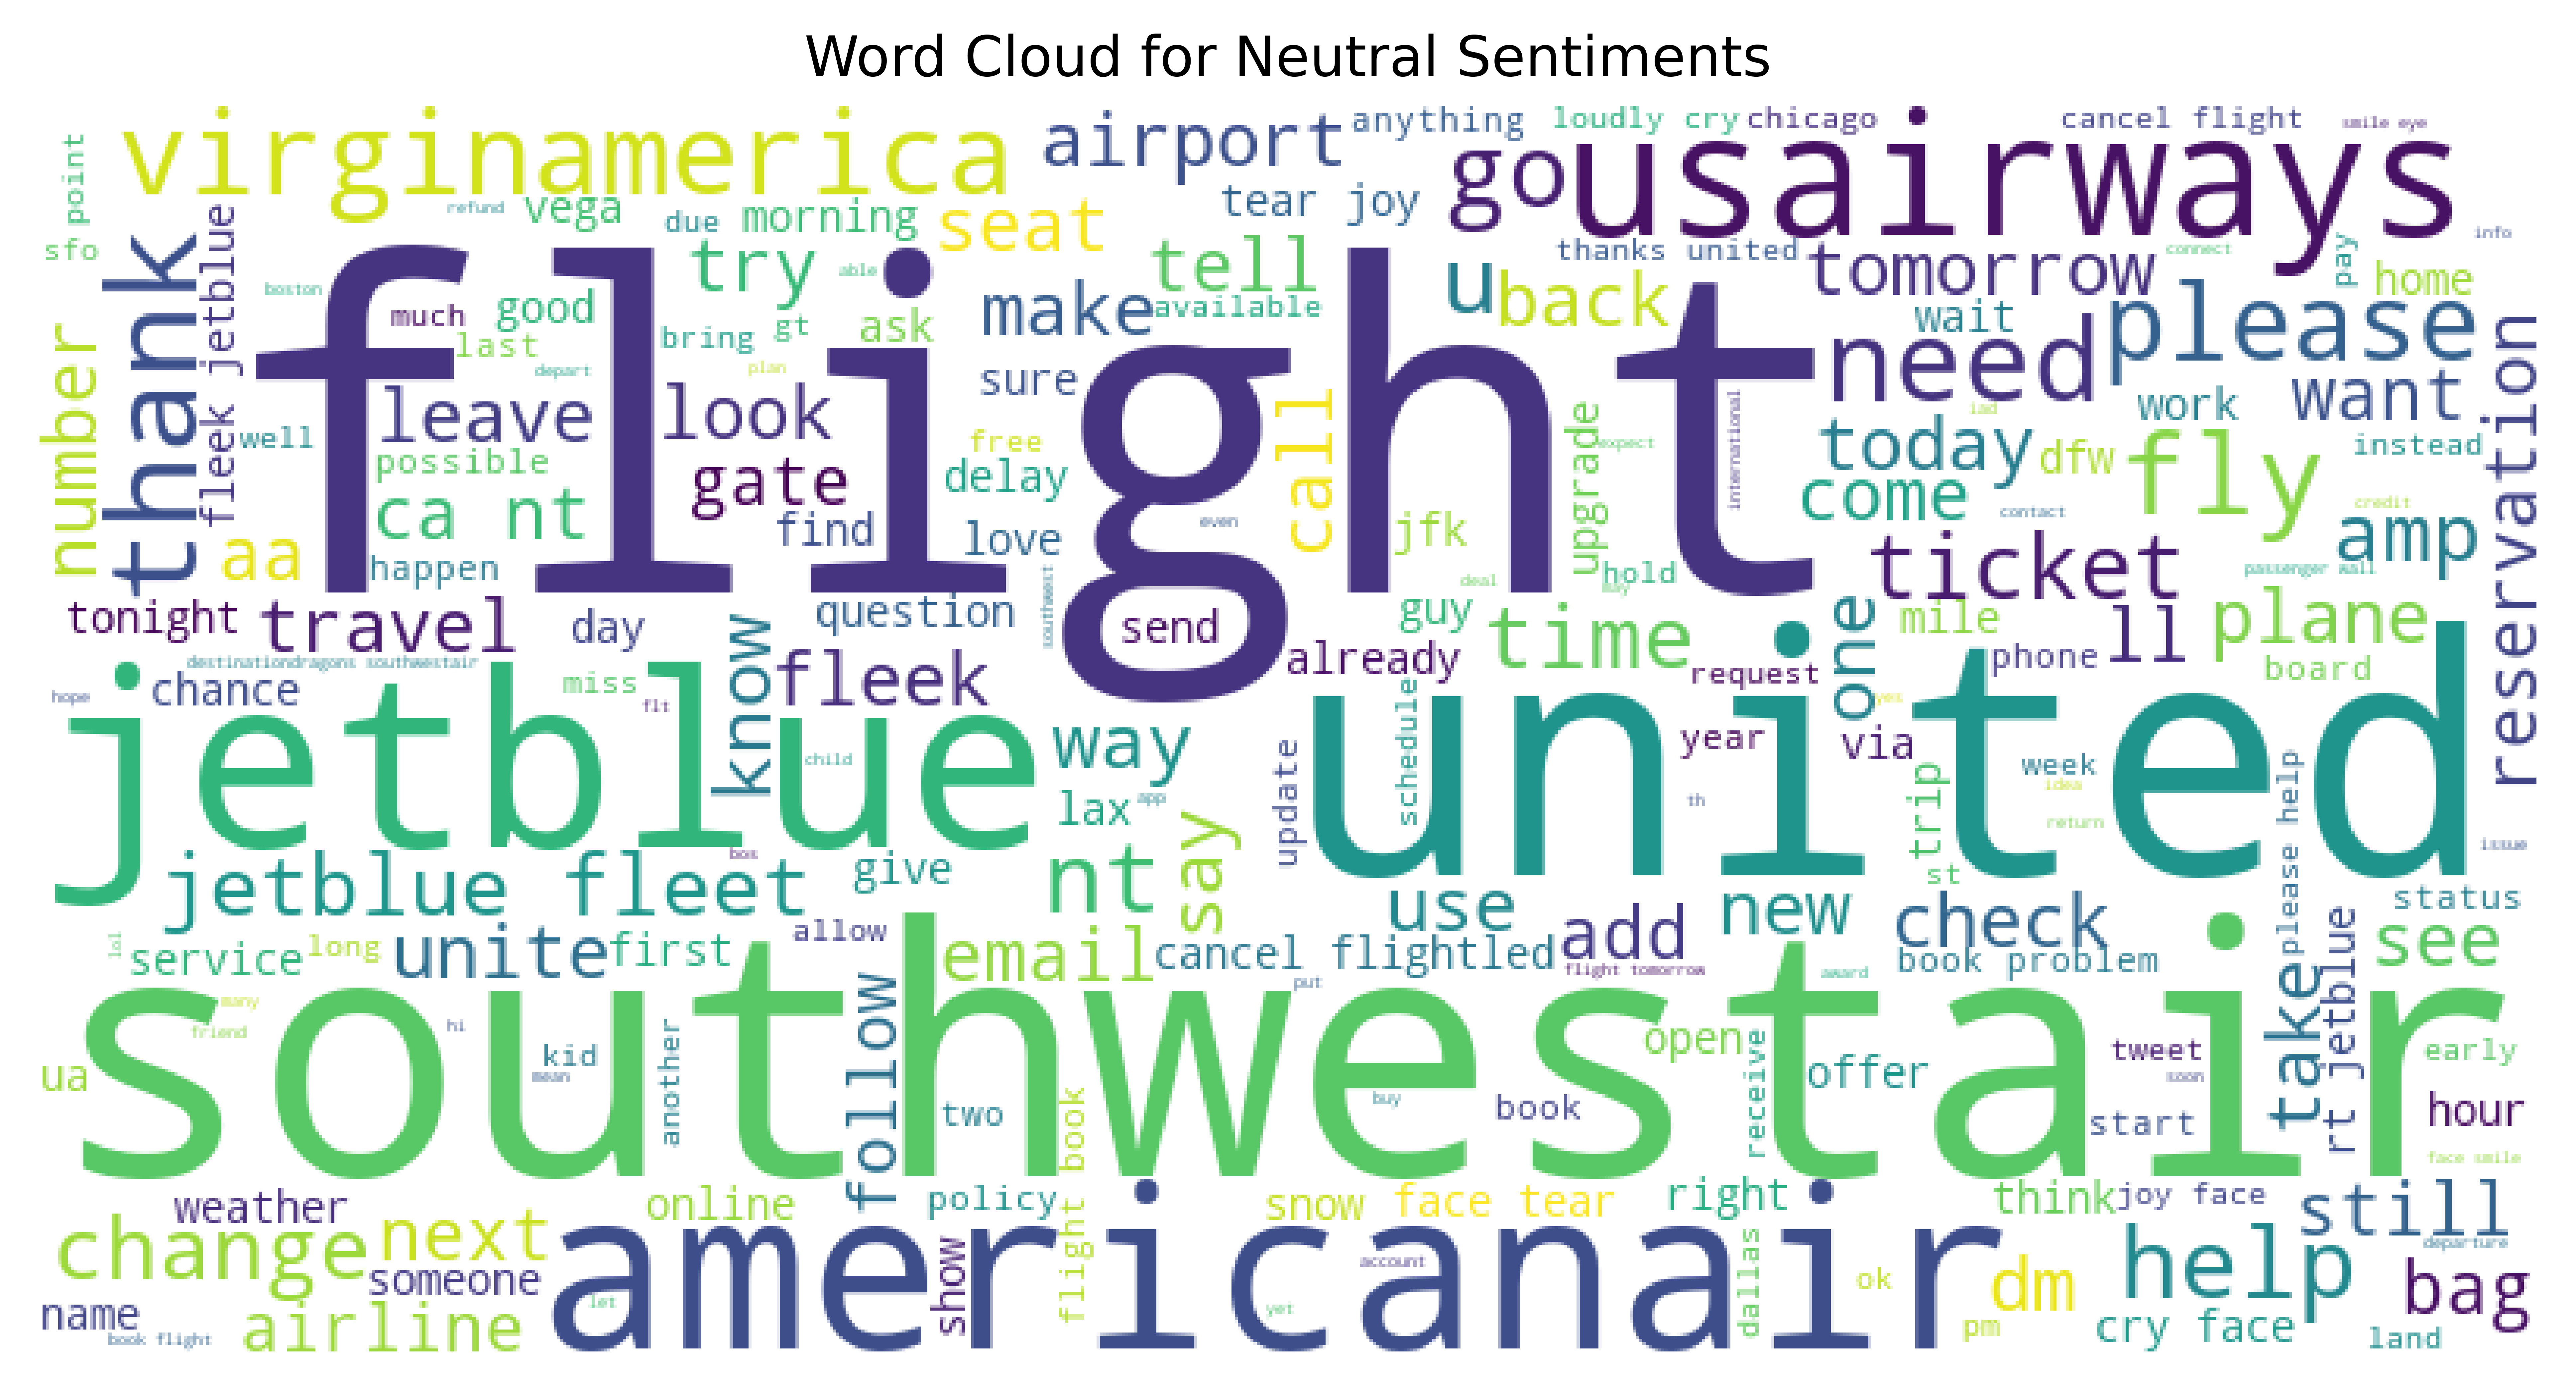

In [154]:
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(data))
    plt.figure(figsize=(10, 5), dpi=1000)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds for each label
for label in ['positive', 'neutral', 'negative']:
    subset = df[df['airline_sentiment'] == label]['text']
    generate_wordcloud(subset, f'Word Cloud for {label.capitalize()} Sentiments')

## Map label into integers

In [155]:
df['airline_sentiment'] = df['airline_sentiment'].replace({'positive': 2, 'neutral': 1, 'negative':0})

C:\Users\Asty\AppData\Local\Temp\ipykernel_182820\1813139062.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['airline_sentiment'] = df['airline_sentiment'].replace({'positive': 2, 'neutral': 1, 'negative':0})


# Data Splitting

In [156]:
RANDOM_SEED = 42
df_train, df_test = train_test_split(df, test_size=0.3, random_state=RANDOM_SEED)

# Applying TFIDF

In [157]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(df_train['text'])
X_test_tfidf = tfidf.transform(df_test['text'])

In [158]:
X_train_tfidf

<10248x9164 sparse matrix of type '<class 'numpy.float64'>'
	with 113871 stored elements in Compressed Sparse Row format>

In [159]:
X_test_tfidf

<4392x9164 sparse matrix of type '<class 'numpy.float64'>'
	with 47217 stored elements in Compressed Sparse Row format>

In [160]:
y_train = df_train['airline_sentiment']
y_test = df_test['airline_sentiment']

# First Experiment: Base using XGBoost

In [163]:
param_grid = {'min_child_weight': [0.1, 0.2, 0.3],
              'gamma': [0.3, 0.4, 0.5],
              'subsample': [0.3, 0.4, 0.5],
              'colsample_bytree': [0.05, 0.1, 0.15]}

# clf = xgb.XGBClassifier()
# clf.fit(X_train_tfidf, y_train)
grid = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=10, refit=True)
grid.fit(X_train_tfidf, y_train)
y_pred = grid.predict(X_test_tfidf)

print(grid.best_params_)

KeyboardInterrupt: 

In [101]:
# y_pred = clf.predict(X_test_tfidf)

In [162]:
accuracy_xgb_base = accuracy_score(y_test, y_pred)
precision_xgb_base = precision_score(y_test, y_pred, average='micro')
recall_xgb_base = recall_score(y_test, y_pred, average='micro')
f1_xgb_base = f1_score(y_test, y_pred, average='micro')
print('Accuracy: ', accuracy_xgb_base)
print('Precision: ', precision_xgb_base)
print('Recall: ', recall_xgb_base)
print('F1 score: ', f1_xgb_base)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.7918943533697632
Precision:  0.7918943533697632
Recall:  0.7918943533697632
F1 score:  0.7918943533697632
Confusion Matrix:
 [[2567  182   65]
 [ 347  474   63]
 [ 152  105  437]]


# Second Experiment: Base using SVM

In [ ]:
# clf = SVC()
# clf.fit(X_train_tfidf, y_train)

# y_pred = text_clf.predict(X_test)

param_grid = {'C': [0.001,0.01,0.1,1,10,100,1000],
              'gamma': ['scale','auto'],
              'kernel': ['rbf','linear','poly','sigmoid']}

grid = GridSearchCV(SVC(), param_grid, cv=10, refit=True)

grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred_test = grid.predict(X_test)
